<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Visión por Computadora I - TP 3

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en `Material_TPs/TP3/images` a partir del template `Material_TPs/TP3/template`
1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos.
2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen `coca_multi.png` con el mismo témplate del ítem 1.
3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.

Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import imutils

#### **Comenzamos con la detección del logo en cada imagen sin falsos positivos.**

In [2]:
images_paths = ['images/coca_logo_1.png','images/coca_logo_2.png','images/coca_retro_1.png',
          'images/coca_retro_2.png','images/logo_1.png', 'images/COCA-COLA-LOGO.png']

In [3]:
images = []

# Cargamos las imagenes a procesar
for i in images_paths:
    img = cv.imread(i)
    images.append(img)

template = cv.imread('template/pattern.png', 0)

In [4]:
def search_logo(img,template,resizable_obj,m):

    max_corr_value = -1

    for scale in np.linspace(0.3, 1.0, 20)[::-1]:

        if resizable_obj=='img':
            img_resized = imutils.resize(img, width = int(img.shape[1] * scale))
            template_resized = template
        elif resizable_obj=='tmp':
            template_resized = imutils.resize(template, width = int(template.shape[1] * scale))
            img_resized = img
        
        img_rgb= cv.cvtColor(img_resized, cv.COLOR_BGR2RGB)
        img_gray= cv.cvtColor(img_resized, cv.COLOR_BGR2GRAY)

        (iW,iH) = img_gray.shape[::-1]
        (tW,tH) = template_resized.shape[::-1]

        if (tW > iW) or (tH > iH):
            continue
        
        img_salida = img_rgb.copy()
        method = eval(m)
        res = cv.matchTemplate(img_gray, template_resized, method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

        if (max_corr_value==0) or (max_val > max_corr_value):
            max_corr_value = max_val
            top_left = max_loc
            bottom_right = (top_left[0] + tW, top_left[1] + tH)
    
    cv.rectangle(img_salida,top_left, bottom_right, (0,0,255), 2)
    plt.figure()
    plt.subplot(122),plt.imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.show()


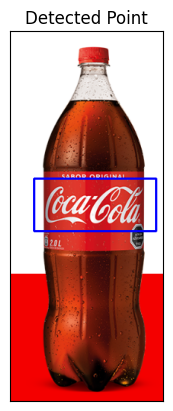

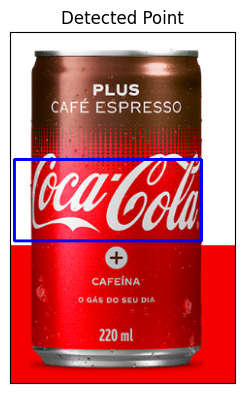

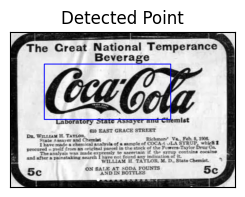

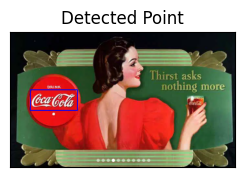

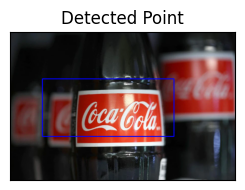

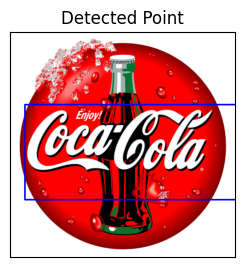

In [5]:
# Vamos variando levemente la función en base a qué imagen necesitamos reajustar, qué método para template matching elegimos
# y si necesitamos invertir los colores del template.

search_logo(images[0],cv.bitwise_not(template),'tmp','cv.TM_CCOEFF')
search_logo(images[1],cv.bitwise_not(template),'tmp','cv.TM_CCOEFF')
search_logo(images[2],template,'tmp','cv.TM_CCOEFF')
search_logo(images[3],cv.bitwise_not(template),'tmp','cv.TM_CCOEFF_NORMED')
search_logo(images[4],cv.bitwise_not(template),'tmp','cv.TM_CCOEFF')
search_logo(images[5],cv.bitwise_not(template),'img','cv.TM_CCOEFF')